In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import data_cleaning_visualization as cv
cleaner=cv.DataCleaningAndVisualization()

In [217]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [218]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [219]:
cleaner.data_info(df)

,Col,dtype,n_uniques,n_nan,unique_val,duplicated
0,car_ID,int64,205,0,"[1, 142, 132, 133, 134, 135, 136, 137, 138, 139]",0
1,symboling,int64,6,0,"[0, 1, 2, 3, -1, -2]",0
2,CarName,object,147,0,"[toyota corona, toyota corolla, peugeot 504, s...",0
3,fueltype,object,2,0,"[gas, diesel]",0
4,aspiration,object,2,0,"[std, turbo]",0
5,doornumber,object,2,0,"[four, two]",0
6,carbody,object,5,0,"[sedan, hatchback, wagon, hardtop, convertible]",0
7,drivewheel,object,3,0,"[fwd, rwd, 4wd]",0
8,enginelocation,object,2,0,"[front, rear]",0
9,wheelbase,float64,53,0,"[94.5, 93.7, 95.7, 96.5, 97.3, 98.4, 104.3, 10...",0


**No nulls found**, ['Cartype','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'] are objects so encoding is needed, 205 carId so total number of rows is 205.



In [220]:
df.shape

(205, 26)

Column 'car_ID' is not categorical.
Column 'CarName' is not categorical.
Column 'wheelbase' is not categorical.
Column 'carlength' is not categorical.
Column 'carwidth' is not categorical.
Column 'carheight' is not categorical.
Column 'curbweight' is not categorical.
Column 'enginesize' is not categorical.
Column 'boreratio' is not categorical.
Column 'stroke' is not categorical.
Column 'compressionratio' is not categorical.
Column 'horsepower' is not categorical.
Column 'peakrpm' is not categorical.
Column 'citympg' is not categorical.
Column 'highwaympg' is not categorical.
Column 'price' is not categorical.


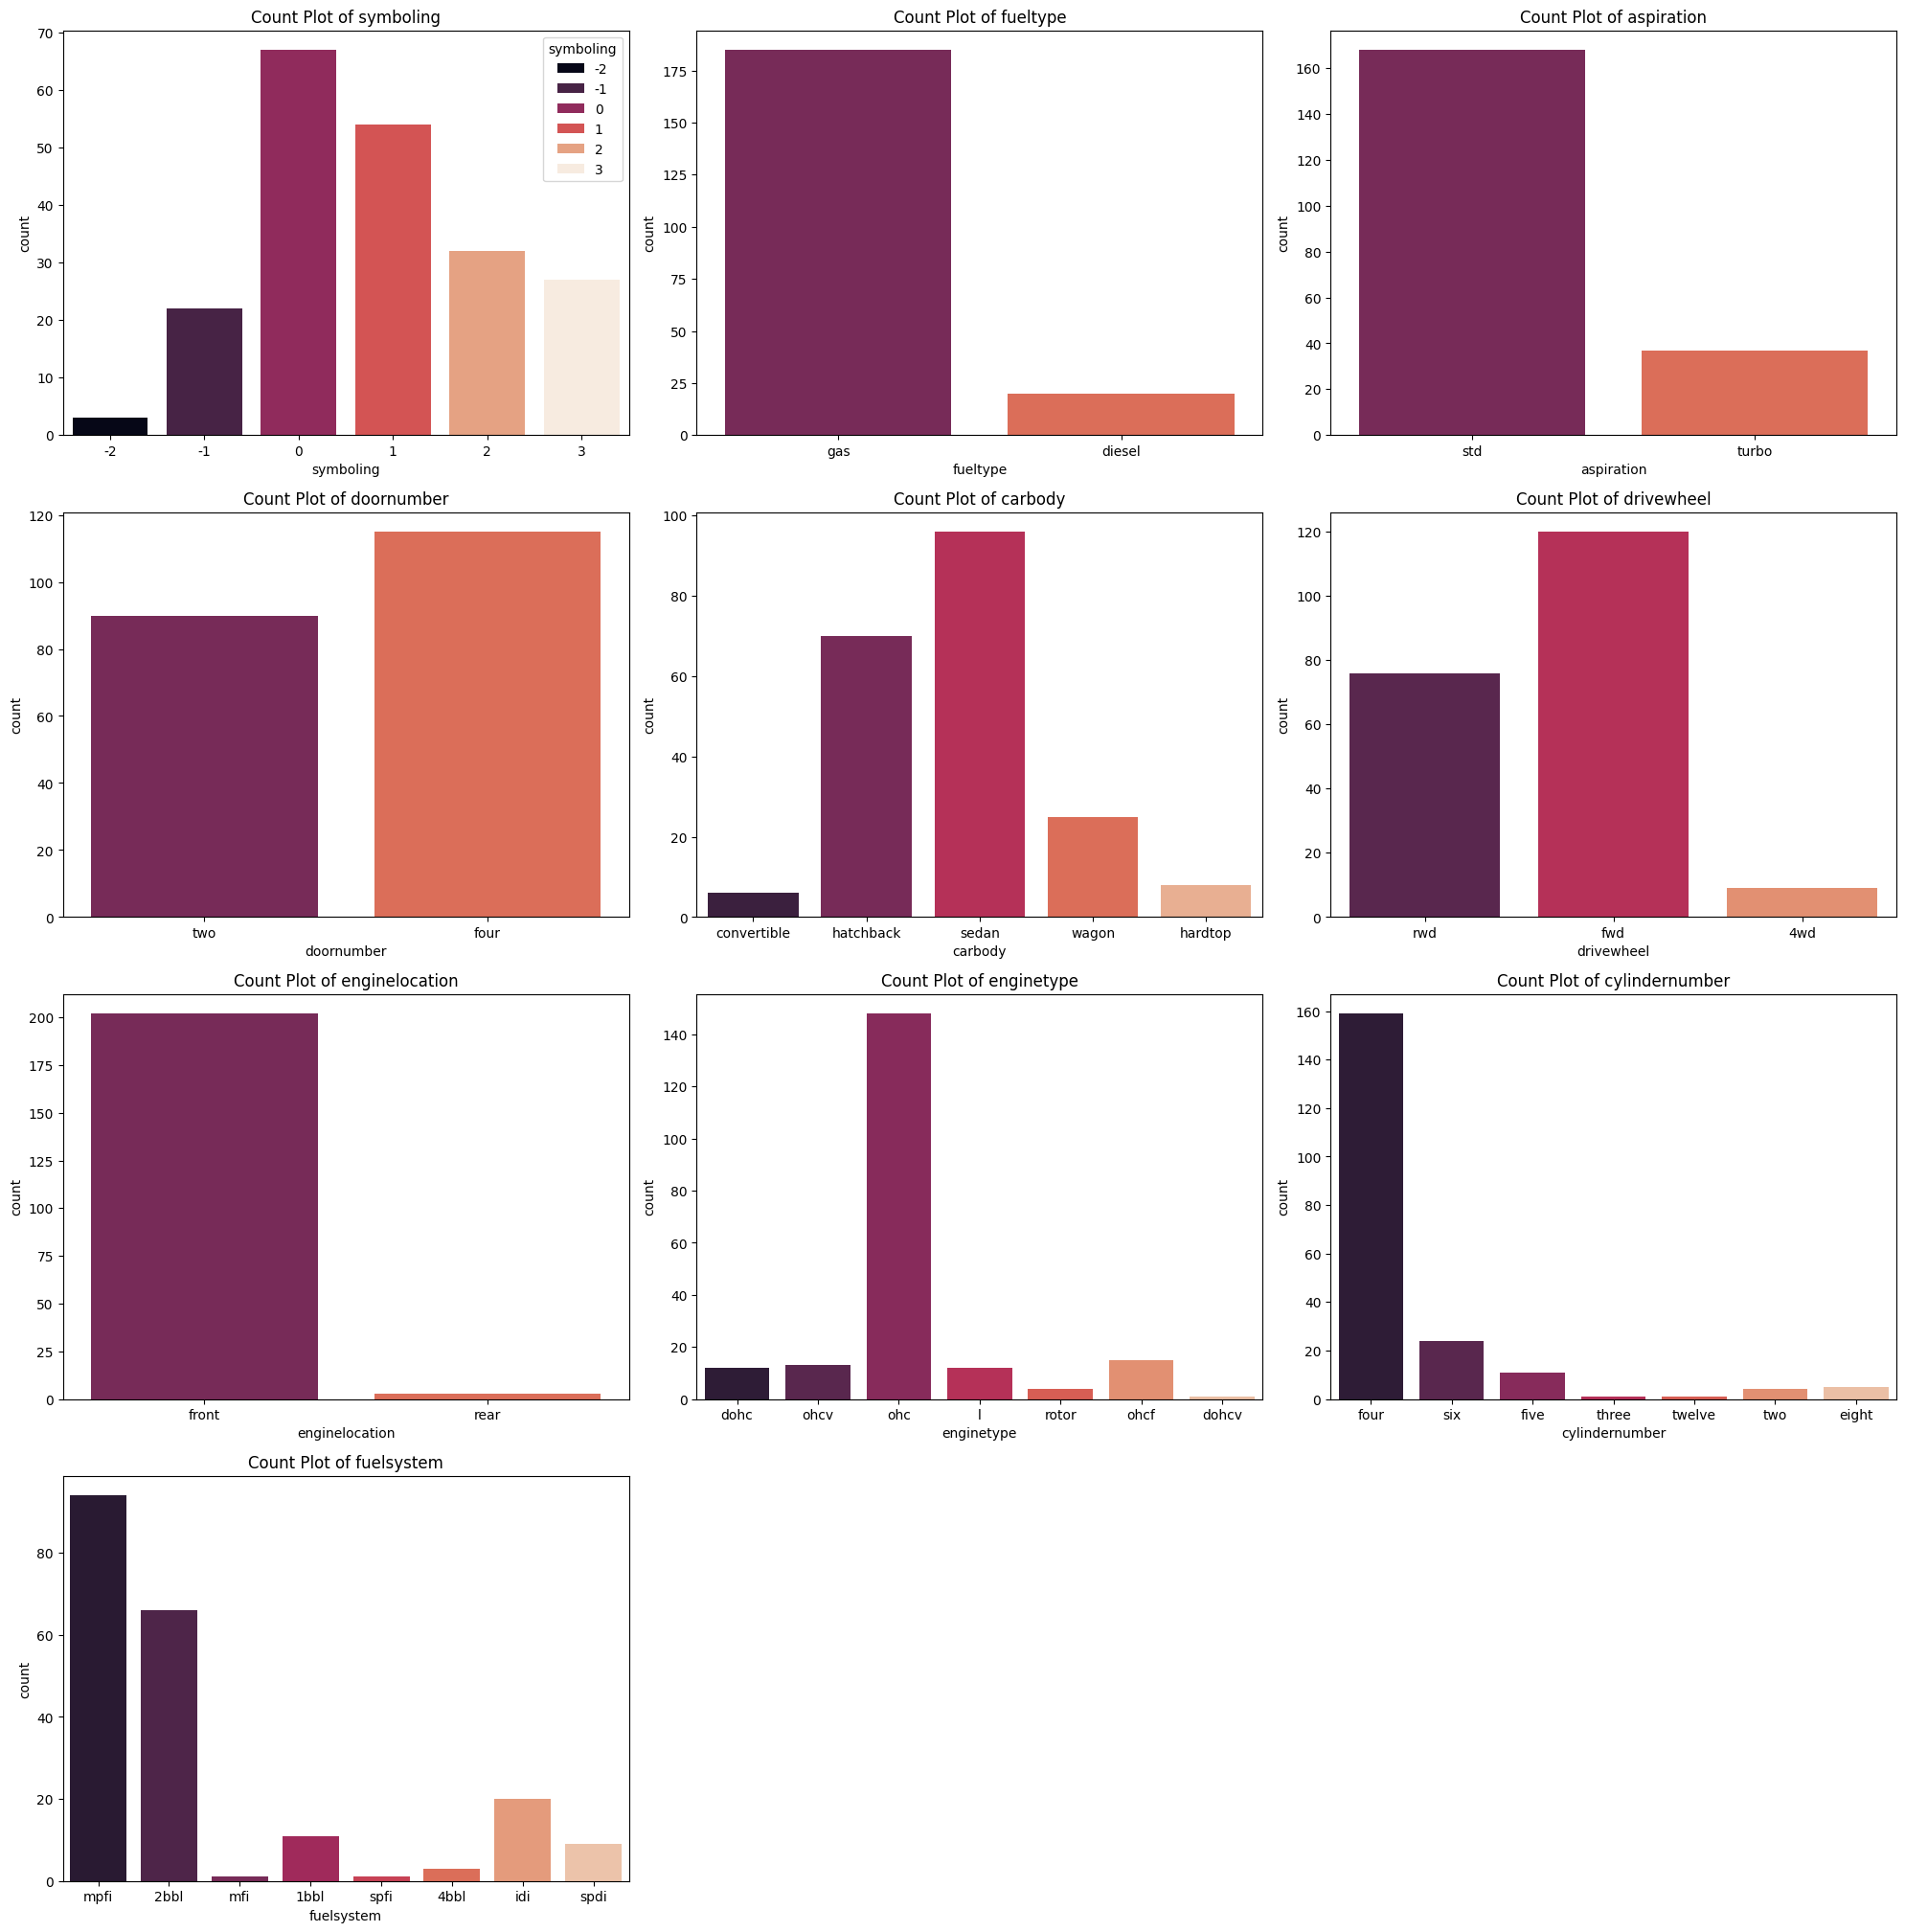

In [221]:
cleaner.categorical_plot(df,df.columns,8)

carName is removed from categorical features by putting number of cat_value = 8; carName has a high value of nuniques.

Column 'car_ID' is not countinuous.
Column 'symboling' is not countinuous.
Column 'CarName' is not countinuous.
Column 'fueltype' is not countinuous.
Column 'aspiration' is not countinuous.
Column 'doornumber' is not countinuous.
Column 'carbody' is not countinuous.
Column 'drivewheel' is not countinuous.
Column 'enginelocation' is not countinuous.
Column 'curbweight' is not countinuous.
Column 'enginetype' is not countinuous.
Column 'cylindernumber' is not countinuous.
Column 'fuelsystem' is not countinuous.
Column 'price' is not countinuous.


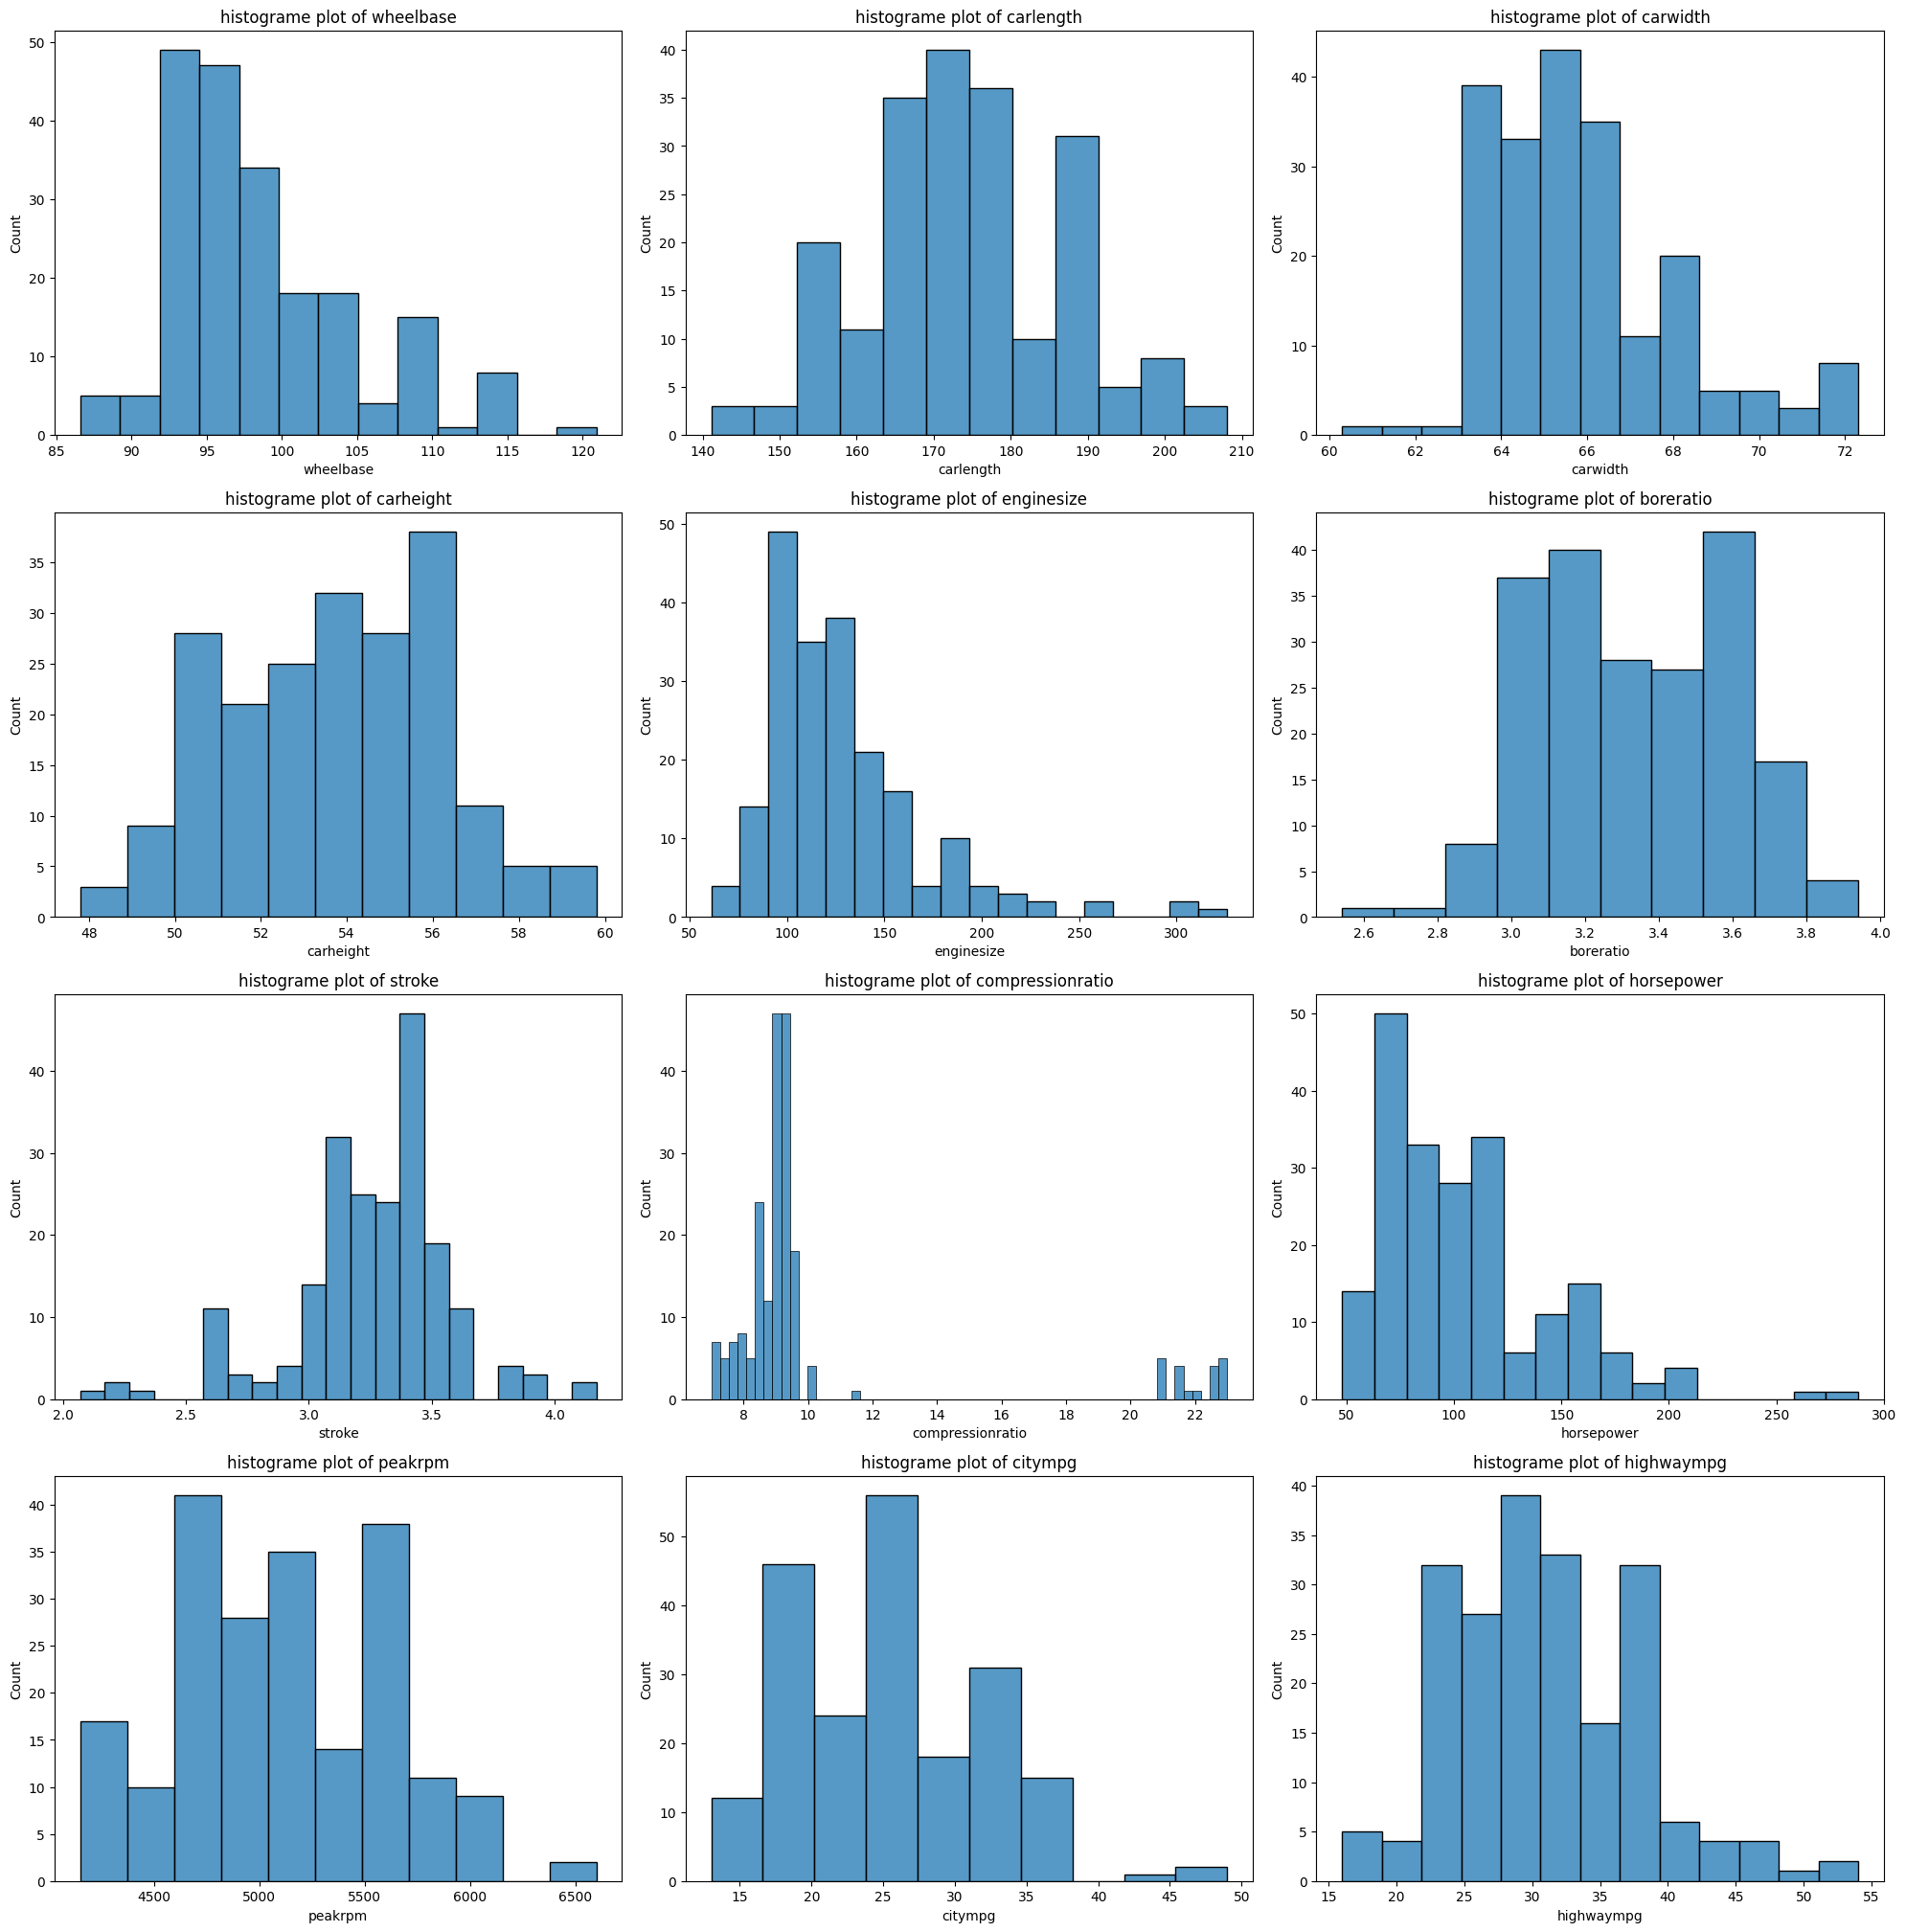

In [222]:
cleaner.continuous_plot(df,df.columns,7)

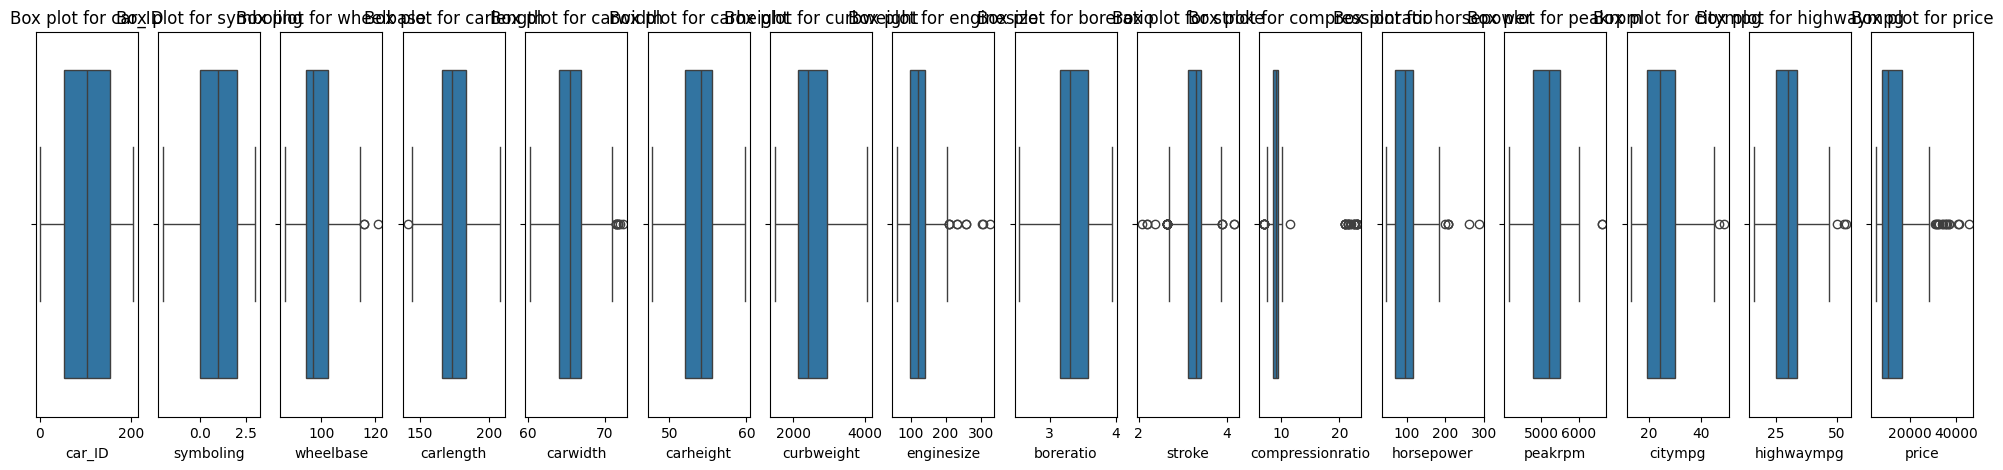

In [223]:
cleaner.boxplot_numeric_columns(df)

Not a good representation using this method.

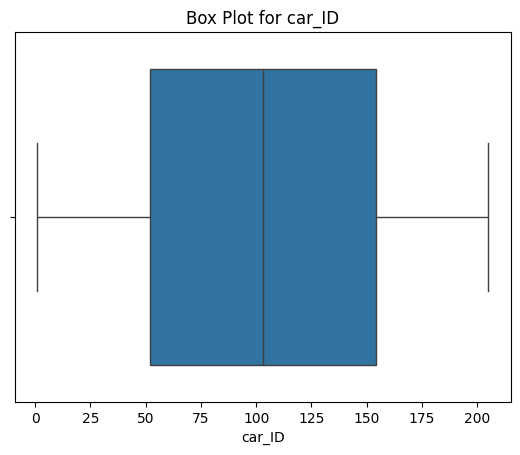

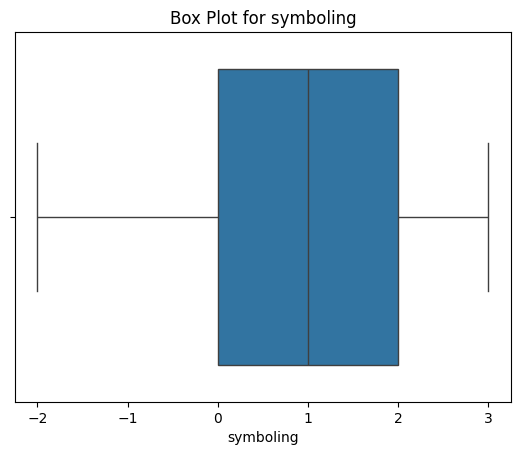

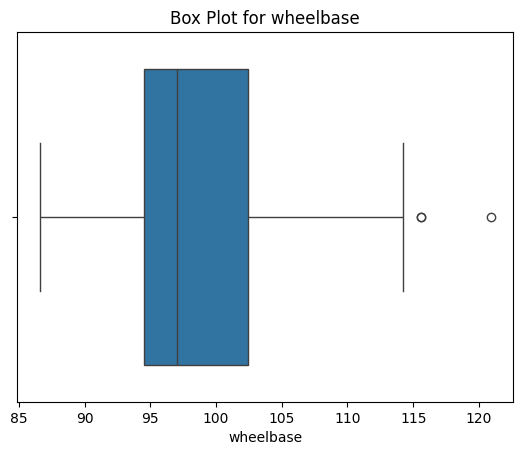

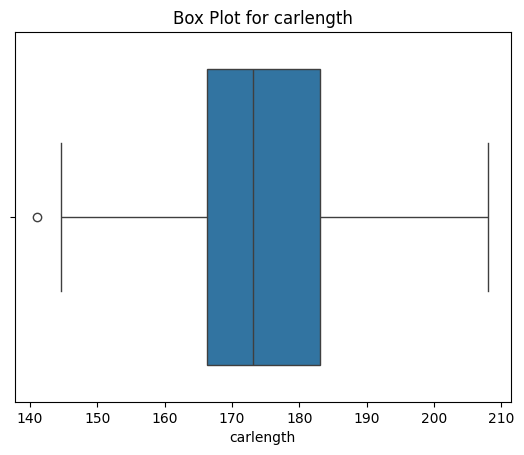

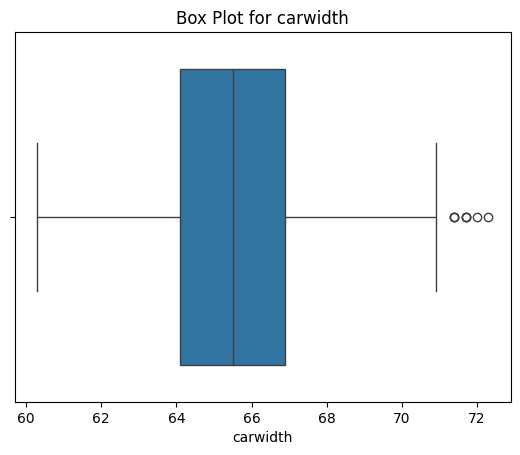

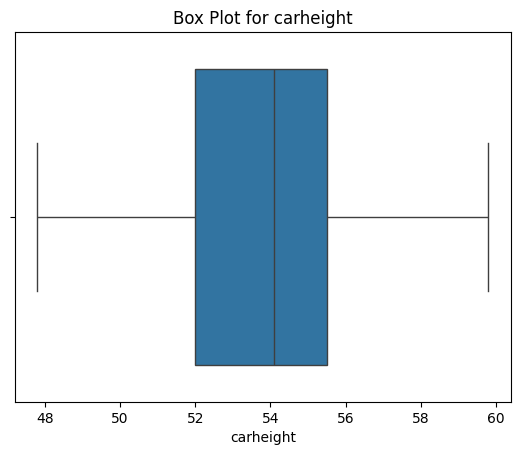

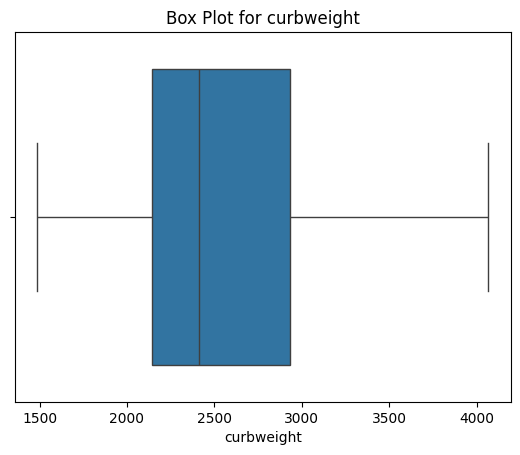

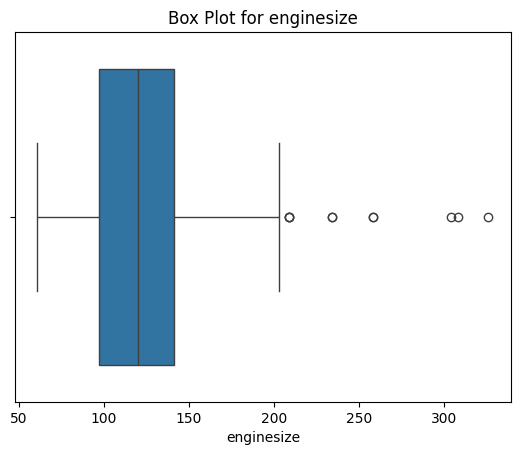

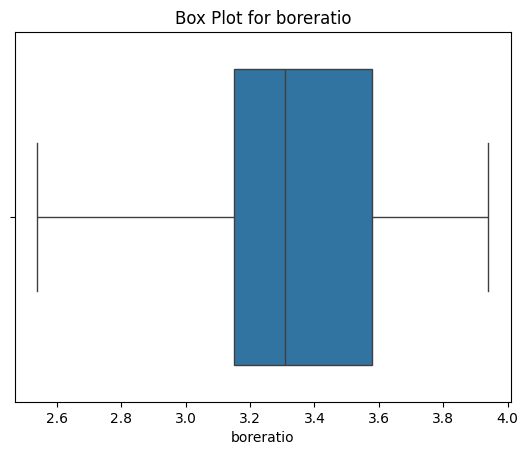

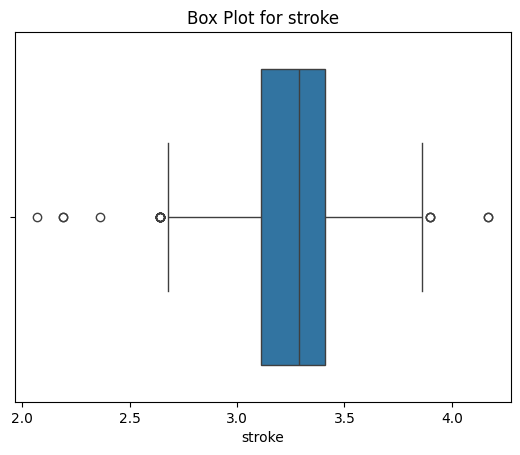

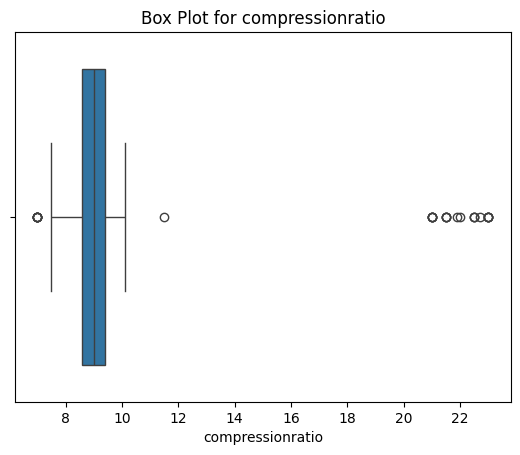

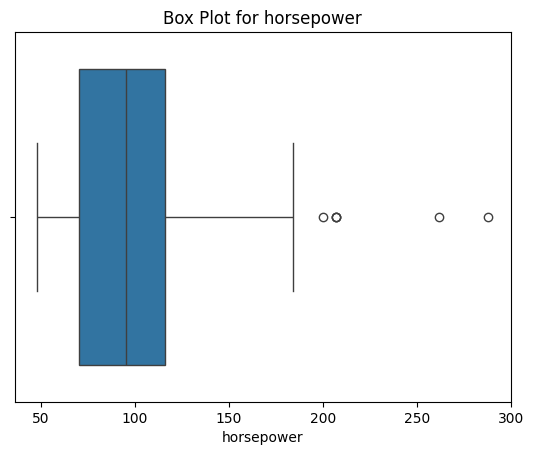

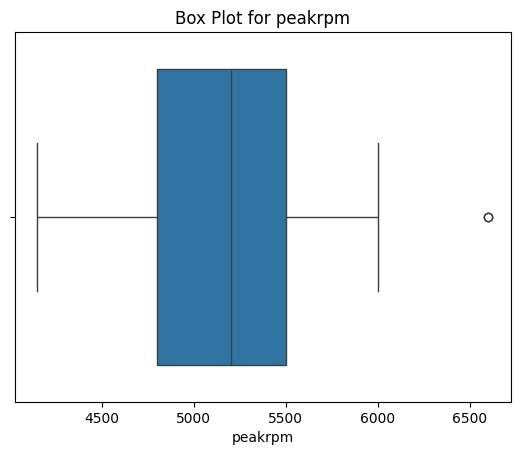

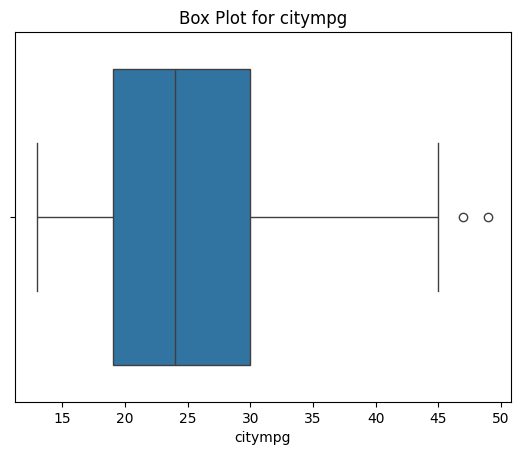

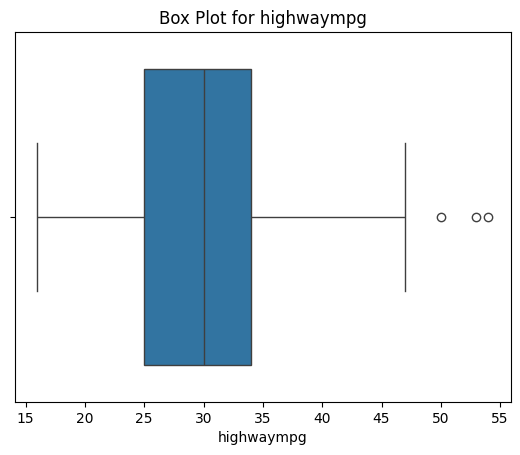

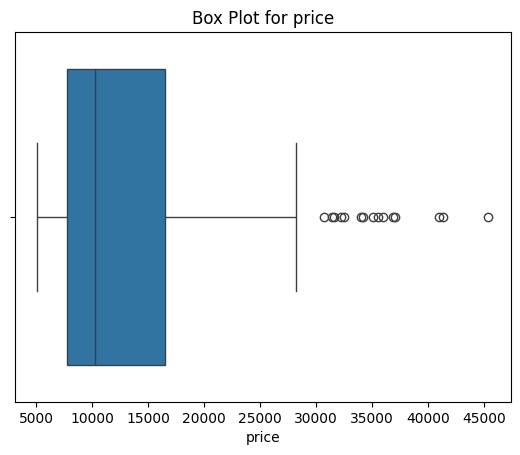

In [224]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()

In [225]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [226]:
df.drop(columns=['car_ID','CarName'],axis=1,inplace=True)

In [227]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

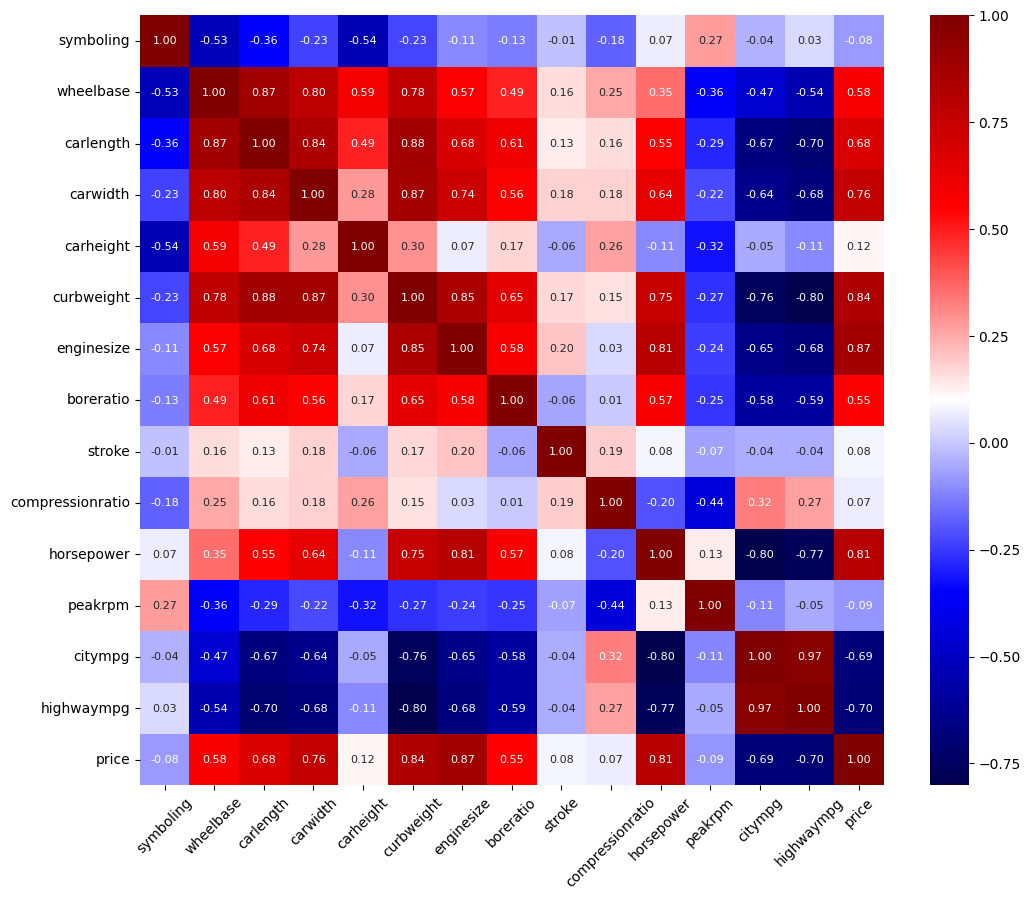

In [228]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="seismic", fmt=".2f", annot_kws={"size": 8})
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

1. Strong positive correlation between price,carwidth,curbweight,enginesize and compressionratio.

2. Strong positive correlation between horsepower and enginesize.

3. Strong negative correlation between citympg,highwaympg and curbweight. citympg may be removed
4. carheight, stroke, compressionratio, symboling and peakrpm have very low correlation with the price.
5. Very strong positive correlation between wheelbase with (carlength and carwidth)





In [229]:
df.duplicated().sum()

1

In [230]:
df.drop_duplicates(inplace=True)

In [231]:
df.duplicated().sum()

0

In [232]:
df.shape

(204, 24)

In [233]:
df=cleaner.remove_outliers_iqr_countinuous(df,df.columns)

In [234]:
df.shape

(128, 24)

Was 204 rows became 128 rows so there were 76 outliers.

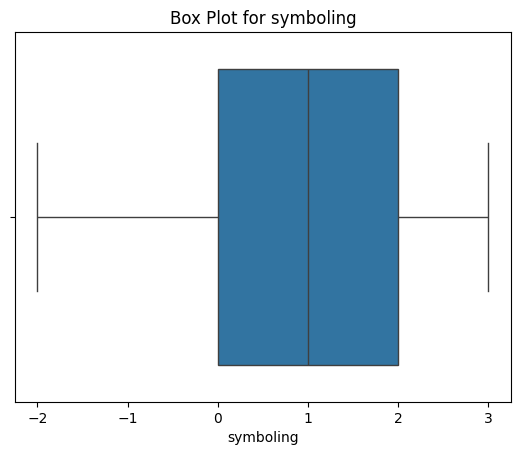

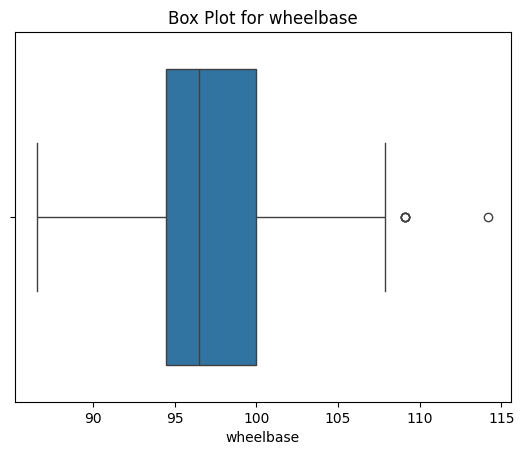

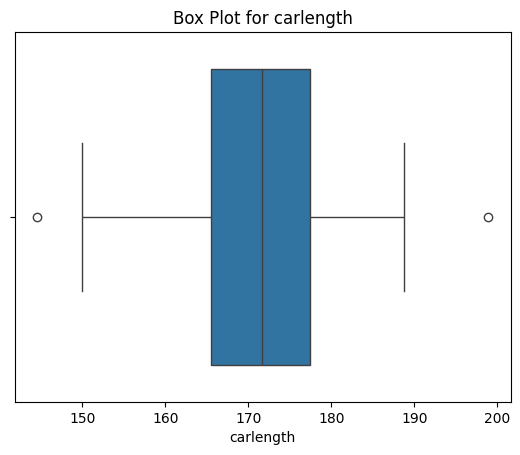

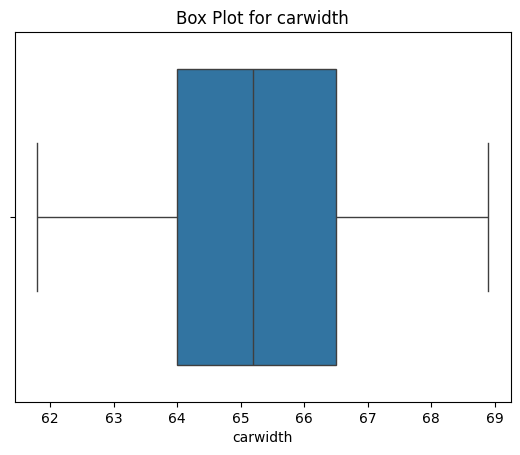

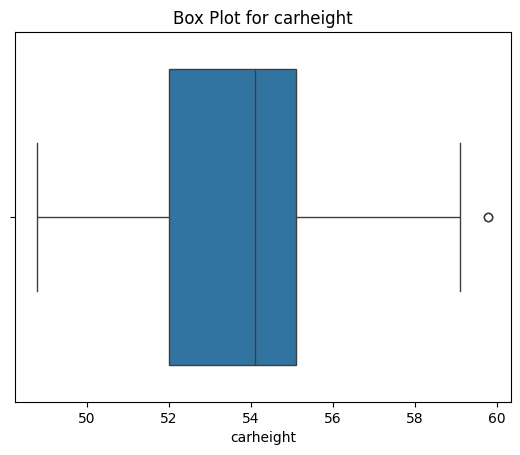

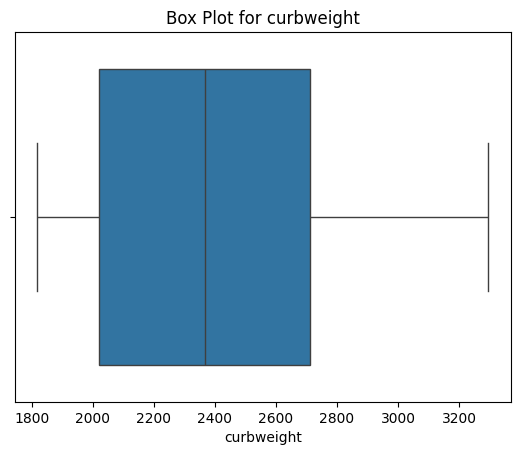

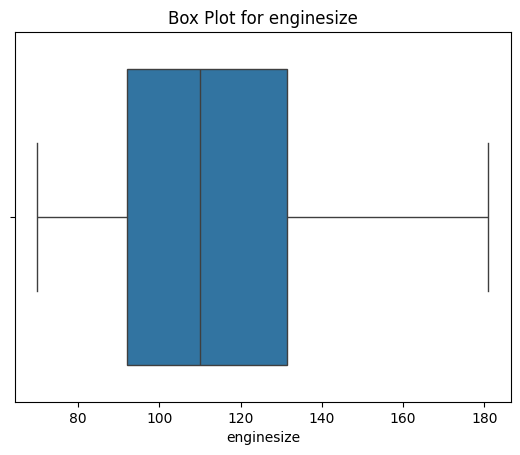

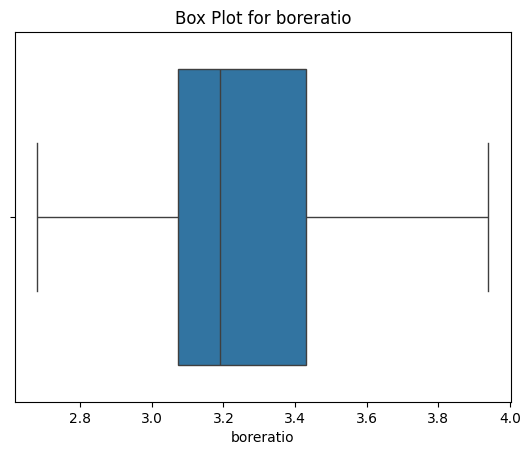

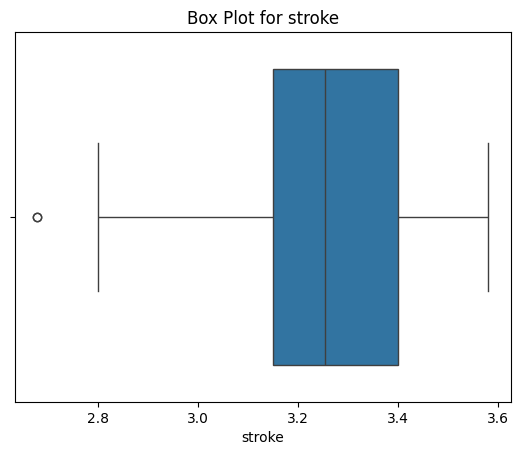

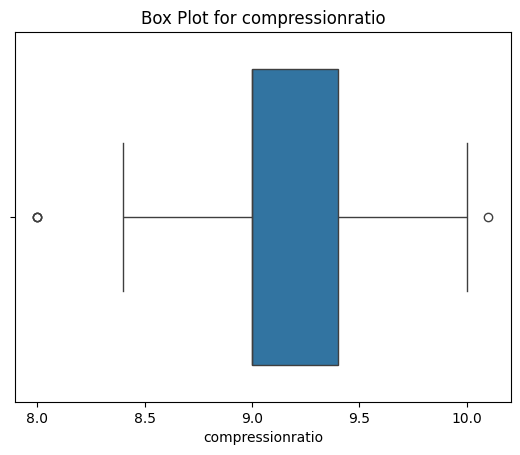

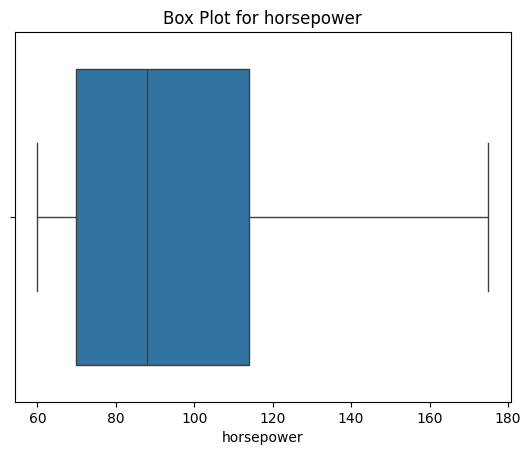

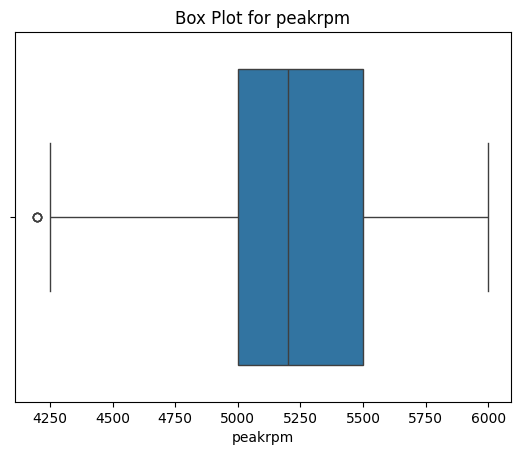

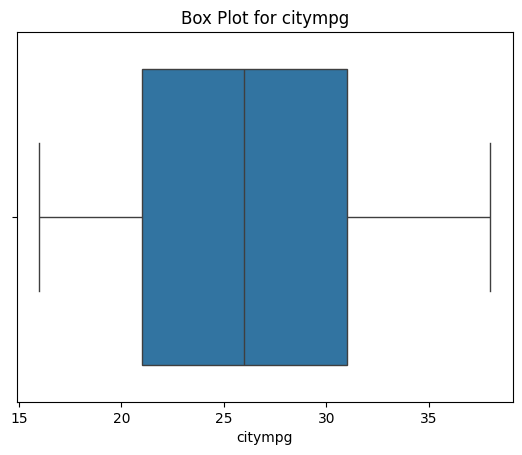

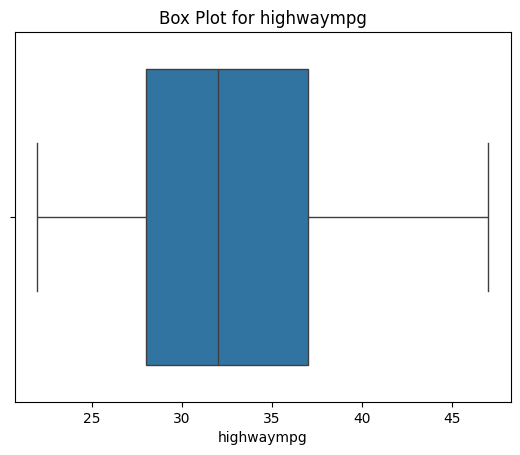

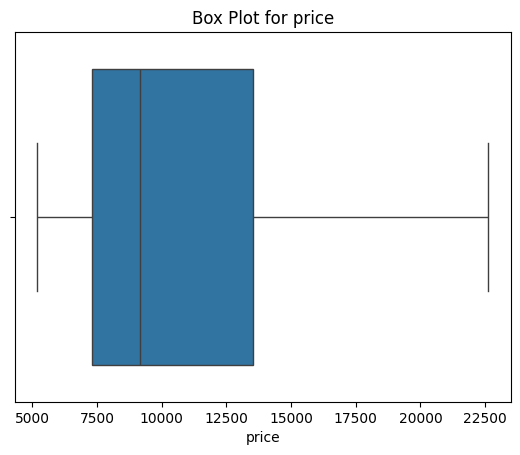

In [235]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
  sns.boxplot(x=numeric_columns[column])
  plt.title(f"Box Plot for {column}")
  plt.show()

In [236]:
df.drop(columns=['citympg','horsepower','carlength','carwidth','carheight', 'stroke', 'compressionratio', 'symboling', 'peakrpm'],axis=1,inplace=True)

Dropped unnecessary features.

In [237]:
df.shape

(128, 15)

In [238]:
df.skew(numeric_only=True).sort_values(ascending=False)

wheelbase     0.934026
price         0.821833
enginesize    0.775902
boreratio     0.481537
curbweight    0.417801
highwaympg    0.180369
dtype: float64

wheelbase, price and enginesize are right_skewed

In [239]:
df_skewed=df

In [240]:
df_skewed['wheelbase']=np.log1p(df_skewed['wheelbase'])
df_skewed['price']=np.log1p(df_skewed['price'])
df_skewed['enginesize']=np.log1p(df_skewed['enginesize'])

In [241]:
df_skewed.skew(numeric_only=True).sort_values(ascending=False)

wheelbase     0.774869
boreratio     0.481537
curbweight    0.417801
enginesize    0.334133
price         0.300719
highwaympg    0.180369
dtype: float64

wheelbase is still right_skewed but I will not apply log transformation on it again.

In [242]:
df_skewed.shape

(128, 15)

In [243]:
df_skewed

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,highwaympg,price
0,gas,std,two,convertible,rwd,front,4.495355,2548,dohc,four,4.875197,mpfi,3.47,27,9.510149
1,gas,std,two,convertible,rwd,front,4.495355,2548,dohc,four,4.875197,mpfi,3.47,27,9.711176
2,gas,std,two,hatchback,rwd,front,4.559126,2823,ohcv,six,5.030438,mpfi,2.68,26,9.711176
3,gas,std,four,sedan,fwd,front,4.613138,2337,ohc,four,4.700480,mpfi,3.19,30,9.543306
4,gas,std,four,sedan,4wd,front,4.609162,2824,ohc,five,4.919981,mpfi,3.19,22,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,gas,std,four,wagon,rwd,front,4.656813,3042,ohc,four,4.955827,mpfi,3.78,28,9.712085
124,gas,std,four,sedan,rwd,front,4.701389,2952,ohc,four,4.955827,mpfi,3.78,28,9.731869
125,gas,turbo,four,sedan,rwd,front,4.701389,3049,ohc,four,4.955827,mpfi,3.78,25,9.854612
126,gas,std,four,sedan,rwd,front,4.701389,3012,ohcv,six,5.159055,mpfi,3.58,23,9.975157


Dropped fueltype and aspiration as the number of unique values of both features is nearly only 1 unoque value so it will not affect our model.

In [244]:
Cat_Features=df_skewed.select_dtypes('object')
Cat_Features_Names=Cat_Features.columns
Cat_Features_Names=Cat_Features_Names[1:]
Cat_Features_Names

Index(['aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [245]:
for i in Cat_Features_Names:
  print(df_skewed[i].value_counts())

aspiration
std      123
turbo      5
Name: count, dtype: int64
doornumber
four    70
two     58
Name: count, dtype: int64
carbody
sedan          58
hatchback      48
wagon          14
convertible     4
hardtop         4
Name: count, dtype: int64
drivewheel
fwd    84
rwd    41
4wd     3
Name: count, dtype: int64
enginelocation
front    128
Name: count, dtype: int64
enginetype
ohc      106
dohc       8
ohcv       7
rotor      4
l          3
Name: count, dtype: int64
cylindernumber
four    108
six      13
two       4
five      3
Name: count, dtype: int64
fuelsystem
mpfi    58
2bbl    56
1bbl    10
4bbl     3
spfi     1
Name: count, dtype: int64


In [246]:
df_skewed.drop(columns=['aspiration','enginelocation'],axis=1,inplace=True)

In [247]:
df_skewed

,fueltype,doornumber,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,highwaympg,price
0,gas,two,convertible,rwd,4.495355,2548,dohc,four,4.875197,mpfi,3.47,27,9.510149
1,gas,two,convertible,rwd,4.495355,2548,dohc,four,4.875197,mpfi,3.47,27,9.711176
2,gas,two,hatchback,rwd,4.559126,2823,ohcv,six,5.030438,mpfi,2.68,26,9.711176
3,gas,four,sedan,fwd,4.613138,2337,ohc,four,4.700480,mpfi,3.19,30,9.543306
4,gas,four,sedan,4wd,4.609162,2824,ohc,five,4.919981,mpfi,3.19,22,9.767152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,gas,four,wagon,rwd,4.656813,3042,ohc,four,4.955827,mpfi,3.78,28,9.712085
124,gas,four,sedan,rwd,4.701389,2952,ohc,four,4.955827,mpfi,3.78,28,9.731869
125,gas,four,sedan,rwd,4.701389,3049,ohc,four,4.955827,mpfi,3.78,25,9.854612
126,gas,four,sedan,rwd,4.701389,3012,ohcv,six,5.159055,mpfi,3.58,23,9.975157


In [248]:
Cat_Features=df_skewed.select_dtypes('object')
Cat_Features_Names=Cat_Features.columns
Cat_Features_Names=Cat_Features_Names[1:]
Cat_Features_Names

Index(['doornumber', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [249]:
for i in Cat_Features_Names:
  print(df_skewed[i].value_counts())

doornumber
four    70
two     58
Name: count, dtype: int64
carbody
sedan          58
hatchback      48
wagon          14
convertible     4
hardtop         4
Name: count, dtype: int64
drivewheel
fwd    84
rwd    41
4wd     3
Name: count, dtype: int64
enginetype
ohc      106
dohc       8
ohcv       7
rotor      4
l          3
Name: count, dtype: int64
cylindernumber
four    108
six      13
two       4
five      3
Name: count, dtype: int64
fuelsystem
mpfi    58
2bbl    56
1bbl    10
4bbl     3
spfi     1
Name: count, dtype: int64


In [250]:
# df_skewed = df_skewed[df_skewed['carbody'] != 'hardtop']
# df_skewed = df_skewed[df_skewed['carbody'] != 'convertible']
# df_skewed = df_skewed[df_skewed['drivewheel'] != '4wd']
# df_skewed = df_skewed[df_skewed['fuelsystem'] != '4bbl']
# df_skewed = df_skewed[df_skewed['fuelsystem'] != 'spfi']
# df_skewed = df_skewed[df_skewed['cylindernumber'] == 'four']
# df_skewed = df_skewed[df_skewed['cylindernumber'] == 'six']
# df_skewed = df_skewed[df_skewed['enginetype'] == 'ohc']

In [251]:
counts = df_skewed['carbody'].value_counts()
df_skewed = df_skewed.loc[df_skewed['carbody'].isin(counts.index[counts > 5])]

In [252]:
df_skewed['carbody'].value_counts()

carbody
sedan        58
hatchback    48
wagon        14
Name: count, dtype: int64

In [253]:
counts = df_skewed['fuelsystem'].value_counts()
df_skewed = df_skewed.loc[df_skewed['fuelsystem'].isin(counts.index[counts > 9])]

In [254]:
counts = df_skewed['drivewheel'].value_counts()
df_skewed = df_skewed.loc[df_skewed['drivewheel'].isin(counts.index[counts > 4])]

In [255]:
counts = df_skewed['cylindernumber'].value_counts()
df_skewed = df_skewed.loc[df_skewed['cylindernumber'].isin(counts.index[counts > 14])]

In [256]:
counts = df_skewed['enginetype'].value_counts()
df_skewed = df_skewed.loc[df_skewed['enginetype'].isin(counts.index[counts > 9])]

In [257]:
for i in Cat_Features_Names:
  print(df_skewed[i].value_counts())

doornumber
four    55
two     37
Name: count, dtype: int64
carbody
sedan        46
hatchback    37
wagon         9
Name: count, dtype: int64
drivewheel
fwd    75
rwd    17
Name: count, dtype: int64
enginetype
ohc    92
Name: count, dtype: int64
cylindernumber
four    92
Name: count, dtype: int64
fuelsystem
2bbl    53
mpfi    29
1bbl    10
Name: count, dtype: int64


In [258]:
df_skewed.drop(columns=['cylindernumber'],axis=1,inplace=True)

In [259]:
df_dummies = pd.get_dummies(df_skewed, drop_first=True)


In [260]:
df_dummies

,wheelbase,curbweight,enginesize,boreratio,highwaympg,price,doornumber_two,carbody_sedan,carbody_wagon,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi
3,4.613138,2337,4.700480,3.19,30,9.543306,False,True,False,False,False,True
6,4.626932,2395,4.691348,3.50,29,9.706925,True,True,False,True,False,True
7,4.626932,2395,4.691348,3.50,29,9.736606,False,True,False,True,False,True
10,4.559126,1874,4.510860,3.03,43,8.747670,True,False,False,False,True,False
11,4.559126,1909,4.510860,3.03,43,8.791182,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
122,4.656813,2935,4.955827,3.78,28,9.679469,False,True,False,True,False,True
123,4.656813,3042,4.955827,3.78,28,9.712085,False,False,True,True,False,True
124,4.701389,2952,4.955827,3.78,28,9.731869,False,True,False,True,False,True
125,4.701389,3049,4.955827,3.78,25,9.854612,False,True,False,True,False,True


In [261]:
df_skewed

,fueltype,doornumber,carbody,drivewheel,wheelbase,curbweight,enginetype,enginesize,fuelsystem,boreratio,highwaympg,price
3,gas,four,sedan,fwd,4.613138,2337,ohc,4.700480,mpfi,3.19,30,9.543306
6,gas,two,sedan,rwd,4.626932,2395,ohc,4.691348,mpfi,3.50,29,9.706925
7,gas,four,sedan,rwd,4.626932,2395,ohc,4.691348,mpfi,3.50,29,9.736606
10,gas,two,hatchback,fwd,4.559126,1874,ohc,4.510860,2bbl,3.03,43,8.747670
11,gas,four,sedan,fwd,4.559126,1909,ohc,4.510860,2bbl,3.03,43,8.791182
...,...,...,...,...,...,...,...,...,...,...,...,...
122,gas,four,sedan,rwd,4.656813,2935,ohc,4.955827,mpfi,3.78,28,9.679469
123,gas,four,wagon,rwd,4.656813,3042,ohc,4.955827,mpfi,3.78,28,9.712085
124,gas,four,sedan,rwd,4.701389,2952,ohc,4.955827,mpfi,3.78,28,9.731869
125,gas,four,sedan,rwd,4.701389,3049,ohc,4.955827,mpfi,3.78,25,9.854612


In [262]:
from sklearn.preprocessing import StandardScaler

In [263]:
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df_dummies)
df_scaled=pd.DataFrame(df_scaled,columns=df_dummies.columns)

In [264]:
df_scaled

,wheelbase,curbweight,enginesize,boreratio,highwaympg,price,doornumber_two,carbody_sedan,carbody_wagon,drivewheel_rwd,fuelsystem_2bbl,fuelsystem_mpfi
0,0.689215,0.239318,0.123646,-0.195565,-0.862550,1.327744,-0.820200,1.0,-0.329293,-0.476095,-1.165751,1.473911
1,1.031505,0.415164,0.065048,1.006486,-1.076444,1.804965,1.219216,1.0,-0.329293,2.100420,-1.165751,1.473911
2,1.031505,0.415164,0.065048,1.006486,-1.076444,1.891535,-0.820200,1.0,-0.329293,2.100420,-1.165751,1.473911
3,-0.651128,-1.164425,-1.093041,-0.815979,1.918070,-0.992861,1.219216,-1.0,-0.329293,-0.476095,0.857816,-0.678467
4,-0.651128,-1.058310,-1.093041,-0.815979,1.918070,-0.865951,-0.820200,1.0,-0.329293,-0.476095,0.857816,-0.678467
...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.773038,2.052359,1.762057,2.092210,-1.290338,1.724883,-0.820200,1.0,-0.329293,2.100420,-1.165751,1.473911
88,1.773038,2.376766,1.762057,2.092210,-1.290338,1.820014,-0.820200,-1.0,3.036811,2.100420,-1.165751,1.473911
89,2.879209,2.103900,1.762057,2.092210,-1.290338,1.877716,-0.820200,1.0,-0.329293,2.100420,-1.165751,1.473911
90,2.879209,2.397989,1.762057,2.092210,-1.932020,2.235719,-0.820200,1.0,-0.329293,2.100420,-1.165751,1.473911


Training

In [265]:
x=df_scaled.drop(columns=['price'])
y=df_scaled['price']

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [267]:
x_train.shape

(69, 11)

In [268]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [269]:
y_pred_train=lr.predict(x_train)
y_pred_test=lr.predict(x_test)

In [270]:
lr.score(x_train,y_train)

0.8652982968383724

In [271]:
lr.score(x_test,y_test)

0.6672210567194982

In [272]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))

MSE:  0.260791285766589
MAE:  0.38361038162744443


In [274]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)


In [275]:
ridge_model.score(x_train,y_train)

0.8621206544235719

In [276]:
ridge_model.score(x_test,y_test)

0.7159669241018332

In [280]:
x=df_dummies.drop(columns=['price'])
y=df_dummies['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [283]:
ridge.score(x_train,y_train)

0.8300963858608008

In [284]:
ridge.score(x_test,y_test)

0.7998548286115054

In [285]:
from sklearn.model_selection import GridSearchCV
Ridge?

In [295]:
param={'alpha':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}

In [296]:
reg=GridSearchCV(Ridge(),param_grid=param)

In [297]:
reg.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})

In [298]:
reg.best_score_ #This and the reg score are weird and how did the GridSearch made the best alpha 0.1 while the training above with alpha 1 got me better score?

0.5794477311297335

In [299]:
reg.best_params_

{'alpha': 0.1}

In [300]:
reg.score(x_train,y_train)

0.8560042595114212

In [301]:
reg.score(x_test,y_test)

0.7481236385618475

How did the GridSearch made the best alpha 0.1 while the training above with alpha 1 got me better score?